In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
Tota Rows and Columns (Rows,Columns) :  (373, 15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


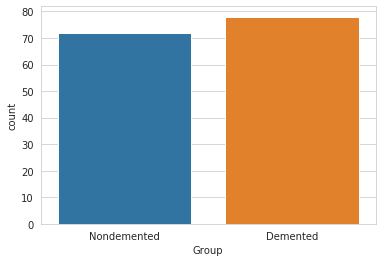

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

df = pd.read_csv('/content/drive/My Drive/Alzheimer disease/oasis_longitudinal.csv')

# print the concise summery of the dataset
df.info()


print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
#print first five rows of the dataset
df.head(5)
df.describe()
df.isna().sum()
sum(df.duplicated())

df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)


              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

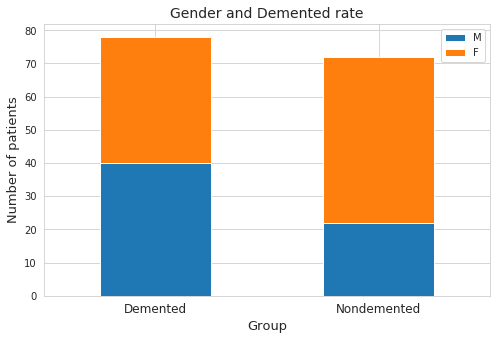

In [0]:
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

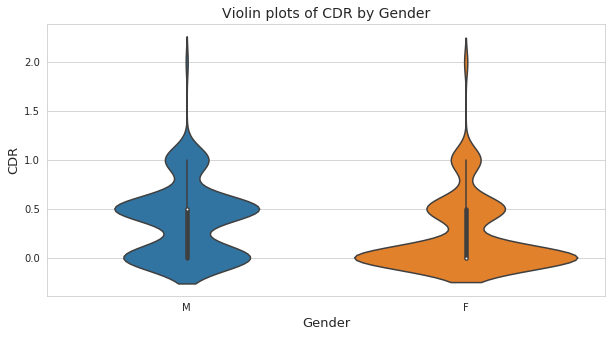

In [0]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

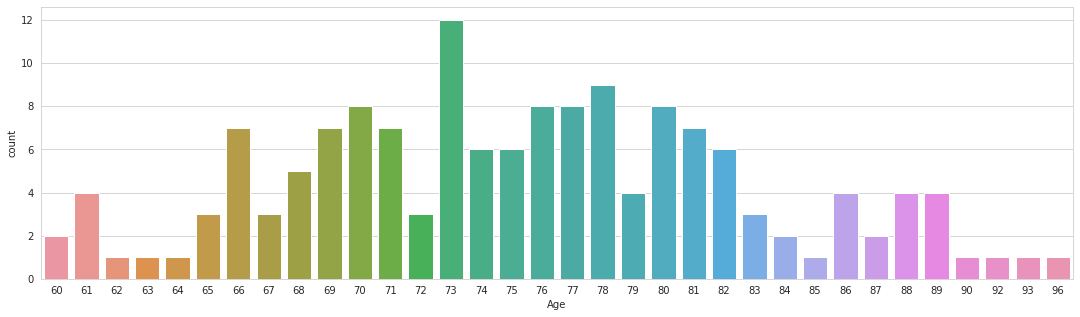

In [0]:
ax = sns.countplot(x='Age', data=ex_df)
ax.figure.set_size_inches(18.5, 5)

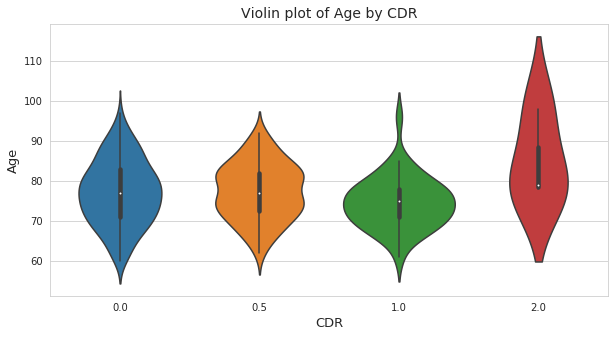

In [0]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

(15.3, 30.0)

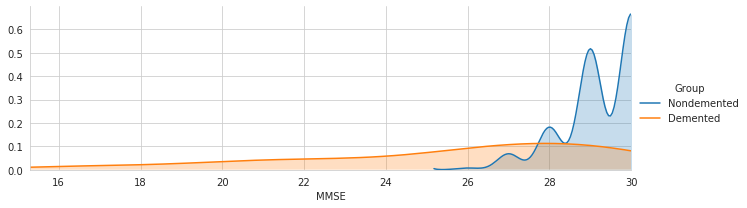

In [0]:

#MMSE Vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

In [0]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369]),)
EDUC :  (array([107, 108, 109]),)
SES :  (array([136, 137, 138, 161, 162, 179, 180]),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366]),)
eTIV :  (array([0, 1]),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282]),)


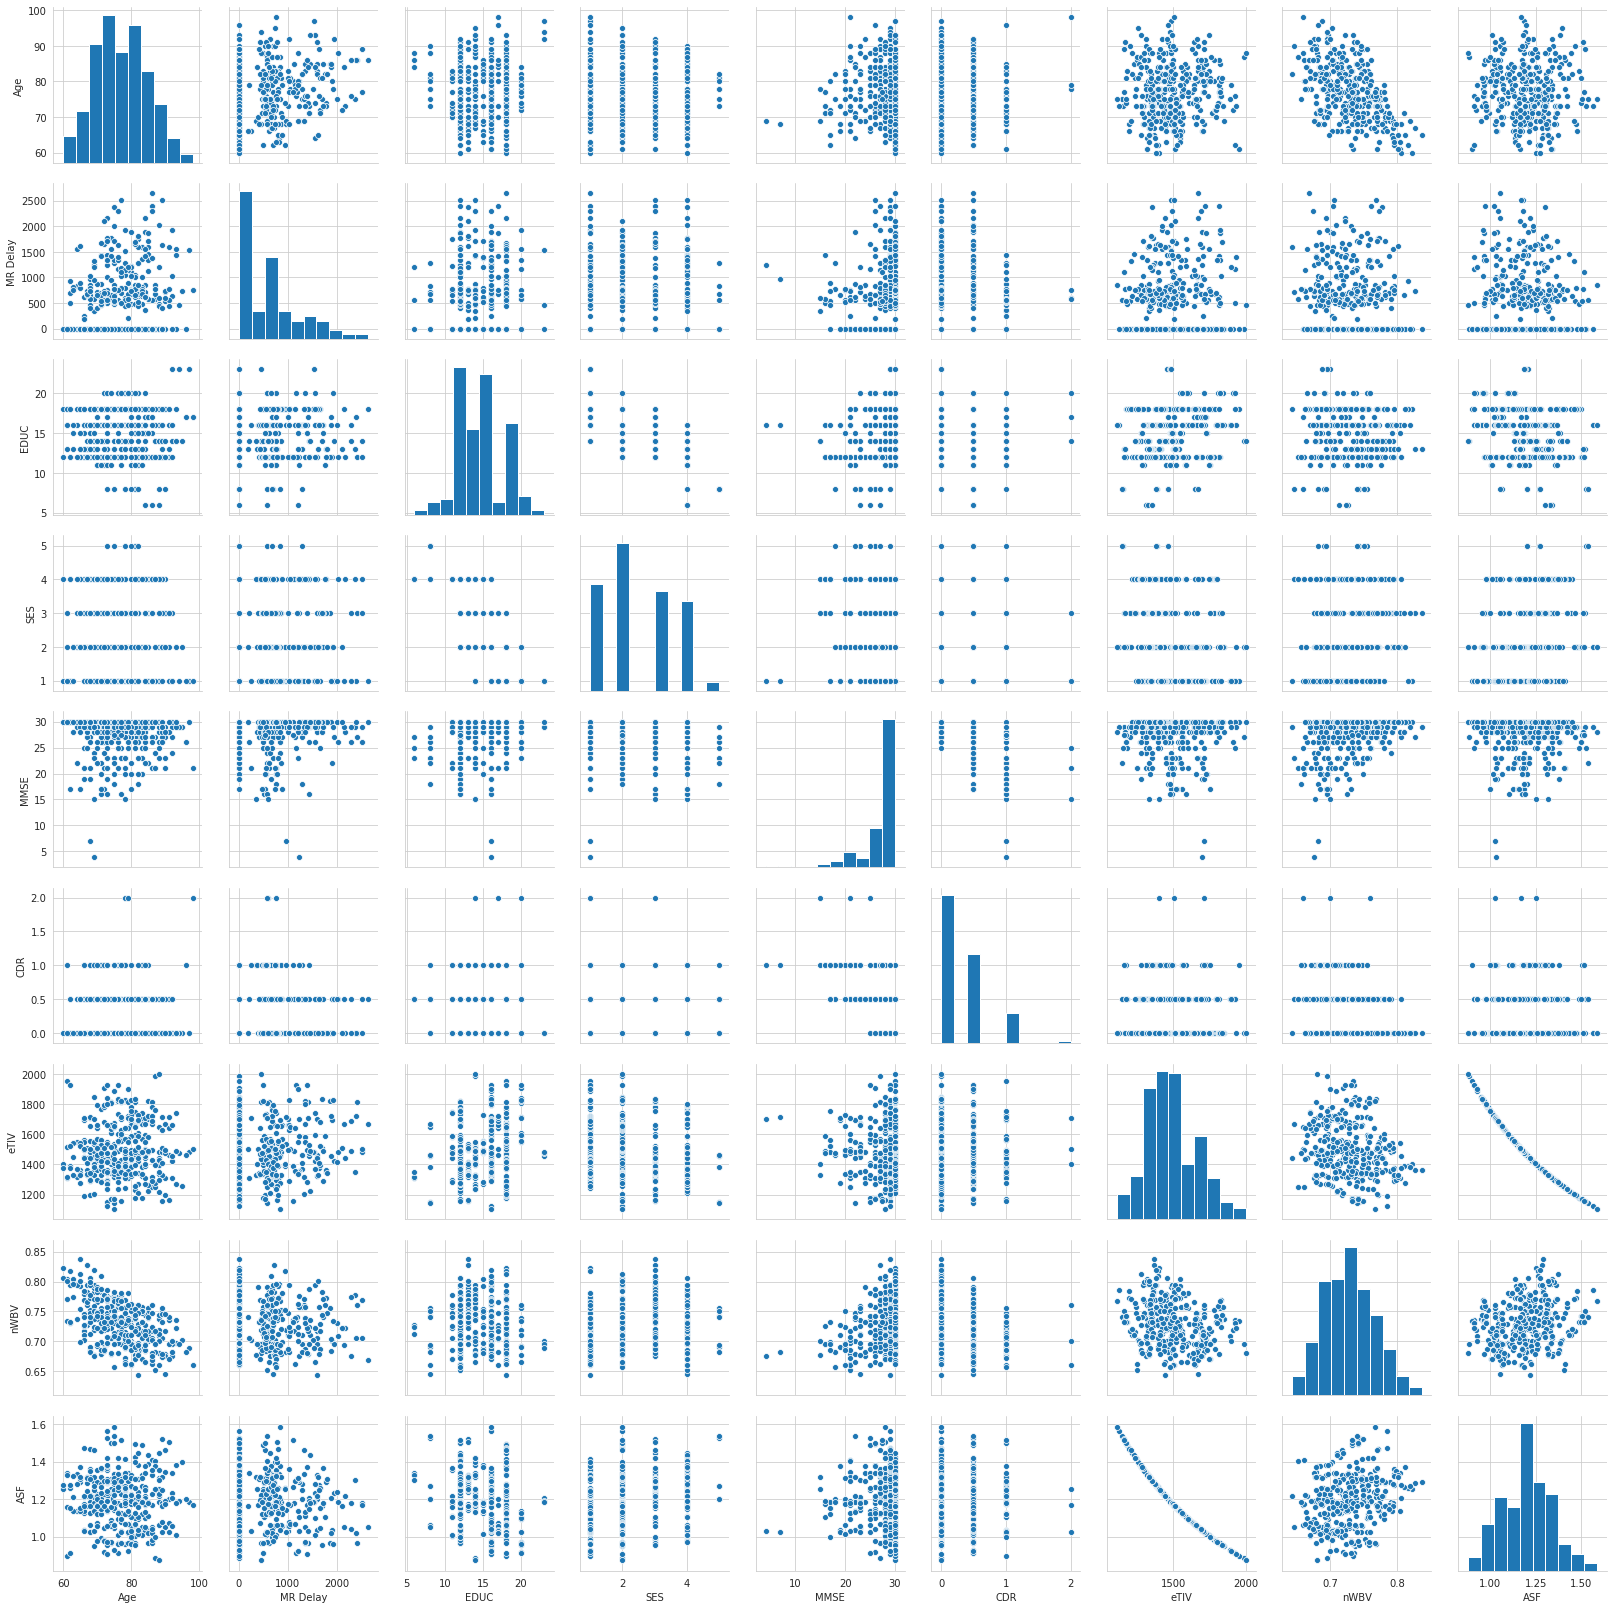

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=df.fillna('')
sns_plot = sns.pairplot(x[cols])

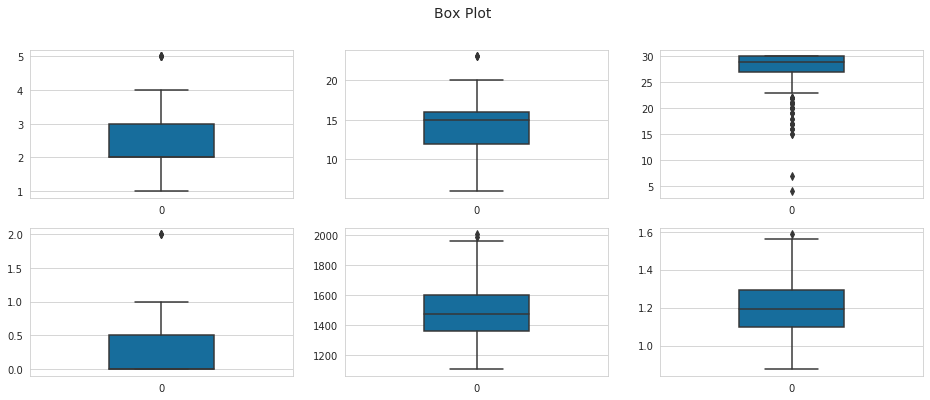

In [0]:
#boxplots which shows the IQR(Interquartile Range )
fig, axes = plt.subplots(2,3,figsize = (16,6))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);
#xlabel("Time");

In [0]:

#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

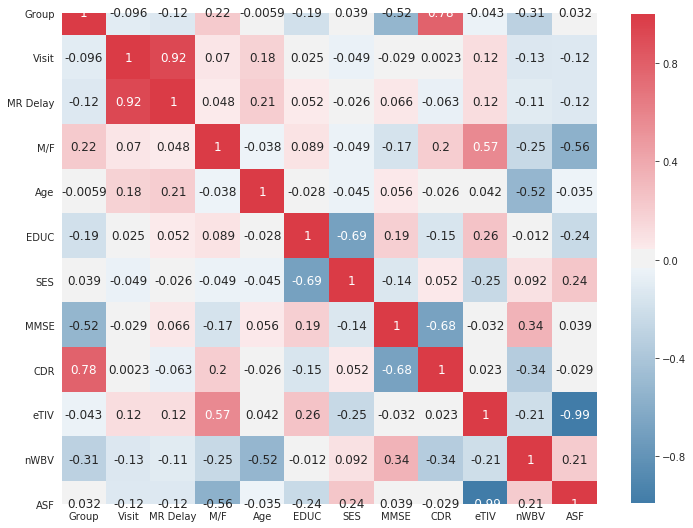

In [0]:

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

plot_correlation_map(df)

In [0]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [0]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']
print(type(df))
X = df[feature_col_names].values
y = df[predicted_class_names].values
print(type(X))
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[  1  27   5 ... 284  35   1]
 [  1  28   5 ... 285  20   0]
 [  1  15   3 ... 231  73  52]
 ...
 [  0   1   4 ...  51 126 215]
 [  0   3   4 ...  56 124 211]
 [  0   5   4 ...  60 126 208]]


In [0]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [0]:

from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [0]:

total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier',
                    'ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier',
                    'MLPClassifier','GaussianNB','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

In [0]:

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[45  7]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.88      0.82      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



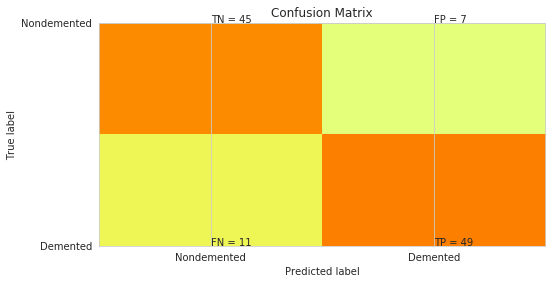

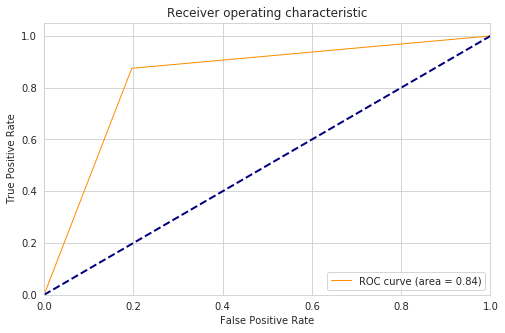


Acuuracy Of the Model:  0.8392857142857143 




In [0]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc) 

[1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1]


Confusion Matrix:
[[46  6]
 [19 41]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        52
           1       0.87      0.68      0.77        60

    accuracy                           0.78       112
   macro avg       0.79      0.78      0.78       112
weighted avg       0.80      0.78      0.78       112



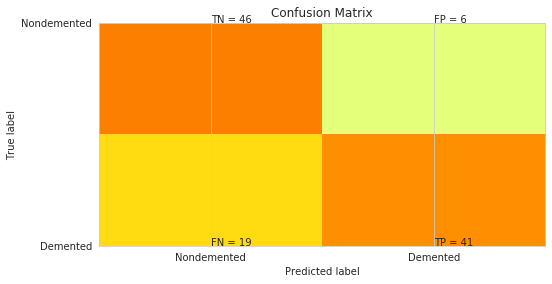

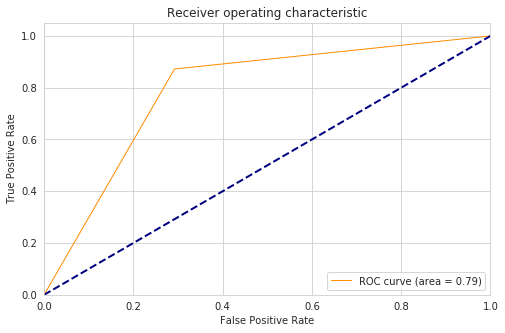


Acuuracy Of the Model:  0.7767857142857143 




In [0]:
svm = SVC(kernel='linear', C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
label = svm.predict(X_test)
print(label)
report_performance(svm) 
roc_curves(svm)
accuracy(svm)



Confusion Matrix:
[[43  9]
 [14 46]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        52
           1       0.84      0.77      0.80        60

    accuracy                           0.79       112
   macro avg       0.80      0.80      0.79       112
weighted avg       0.80      0.79      0.79       112



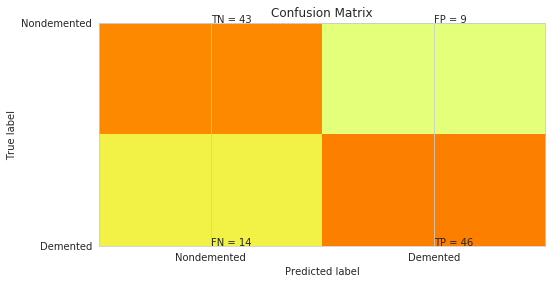

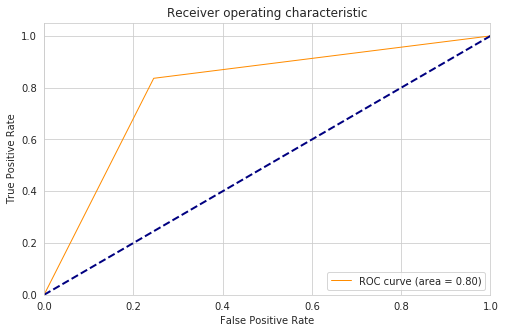


Acuuracy Of the Model:  0.7946428571428571 




In [0]:

clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)



Confusion Matrix:
[[44  8]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.86      0.82      0.84        60

    accuracy                           0.83       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.83      0.83      0.83       112



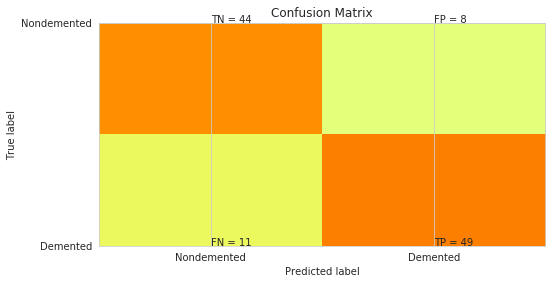

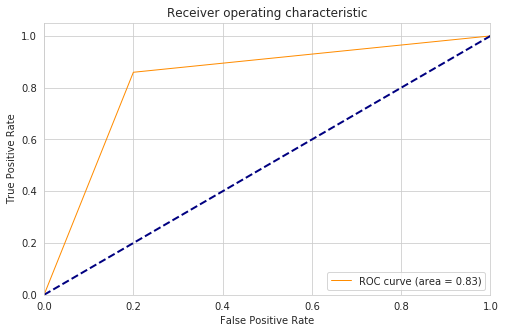


Acuuracy Of the Model:  0.8303571428571429 




In [0]:

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)

In [0]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection   

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245:



Confusion Matrix:
[[45  7]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.88      0.82      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



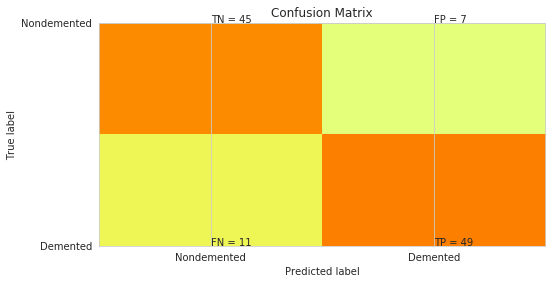

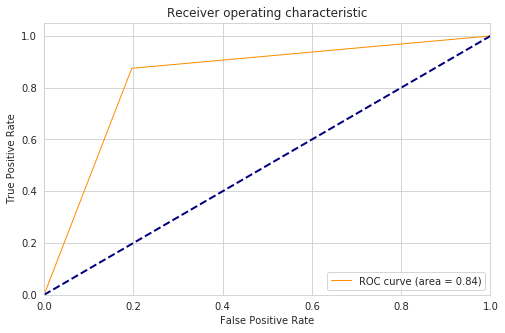


Acuuracy Of the Model:  0.8392857142857143 



Acuuracy Of the Model:  0.8392857142857143 




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245:



Confusion Matrix:
[[44  8]
 [12 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.86      0.80      0.83        60

    accuracy                           0.82       112
   macro avg       0.82      0.82      0.82       112
weighted avg       0.82      0.82      0.82       112



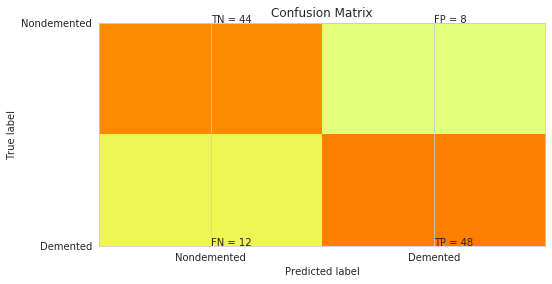

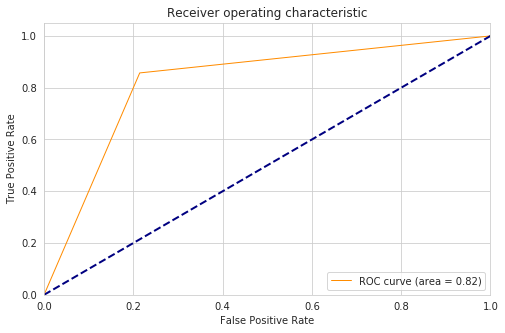


Acuuracy Of the Model:  0.8214285714285714 



Acuuracy Of the Model:  0.8214285714285714 




In [0]:
vote_est = [('etc',ensemble.ExtraTreesClassifier()),
            ('gb',GradientBoostingClassifier()),
            ('abc',AdaBoostClassifier()),
    ('rfc', ensemble.RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)),
    #('svc', svm.SVC(probability=True)),
    #('xgb', XGBClassifier()),
            ('lbgm',LGBMClassifier())
           ]


vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train.ravel())
vote_hard.fit(X_train, y_train.ravel())
report_performance(vote_hard) 
roc_curves(vote_hard)
accuracy(vote_hard)
pred = vote_hard.predict(X_test)
accu = metrics.accuracy_score(y_test,pred)
print("\nAcuuracy Of the Model: ",accu,"\n\n")

vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train.ravel())
vote_soft.fit(X_train, y_train.ravel())
report_performance(vote_soft) 
roc_curves(vote_soft)
accuracy(vote_soft)
#filename = 'model.sav'
#pickle.dump(vote_soft, open(filename, 'wb'))

pred = vote_soft.predict(X_test)
accu = metrics.accuracy_score(y_test,pred)
print("\nAcuuracy Of the Model: ",accu,"\n\n")

In [0]:

clfs =[LGBMClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),
          MLPClassifier(alpha=1),GaussianNB(),LogisticRegression()]

LGBMClassifier : 


Confusion Matrix:
[[43  9]
 [13 47]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        52
           1       0.84      0.78      0.81        60

    accuracy                           0.80       112
   macro avg       0.80      0.81      0.80       112
weighted avg       0.81      0.80      0.80       112



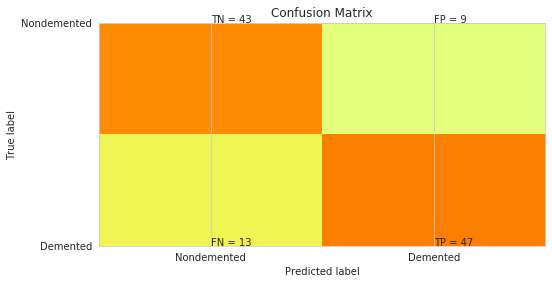

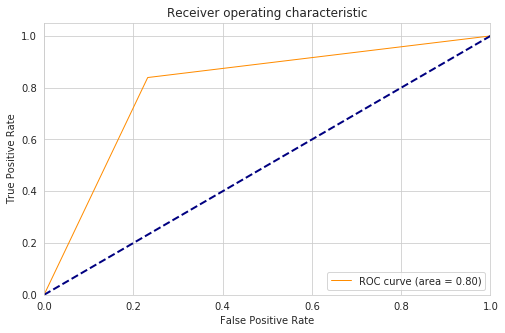


Acuuracy Of the Model:  0.8035714285714286 


ExtraTreesClassifier : 


Confusion Matrix:
[[47  5]
 [13 47]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        52
           1       0.90      0.78      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.85      0.84      0.84       112



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


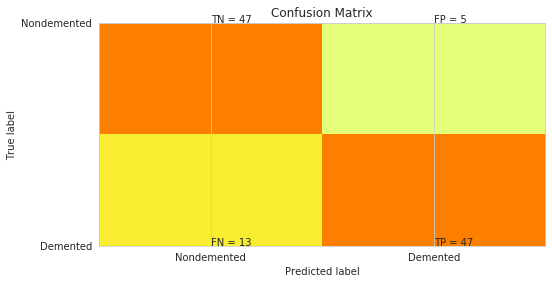

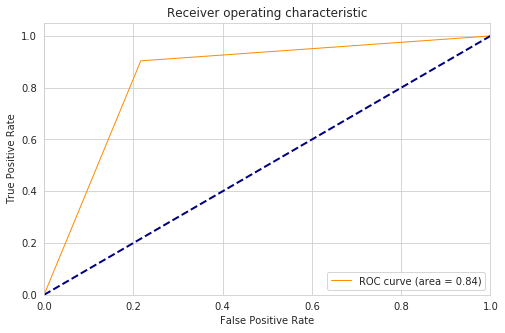


Acuuracy Of the Model:  0.8392857142857143 


GradientBoostingClassifier : 


Confusion Matrix:
[[44  8]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.86      0.83      0.85        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



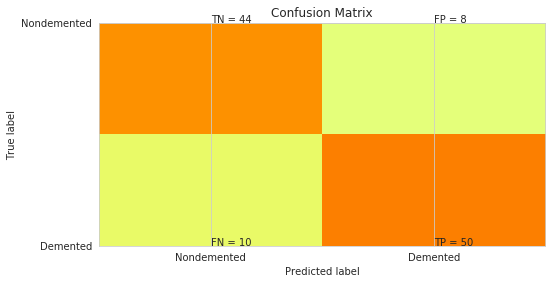

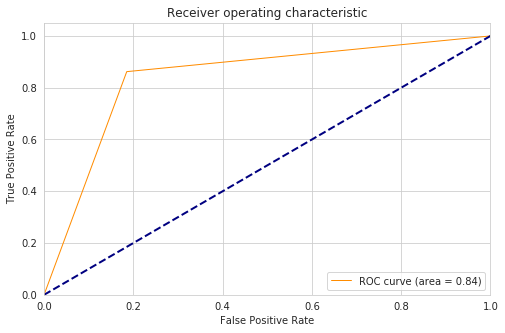


Acuuracy Of the Model:  0.8392857142857143 


AdaBoostClassifier : 


Confusion Matrix:
[[41 11]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        52
           1       0.82      0.82      0.82        60

    accuracy                           0.80       112
   macro avg       0.80      0.80      0.80       112
weighted avg       0.80      0.80      0.80       112



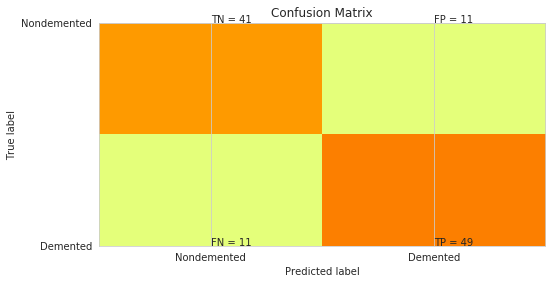

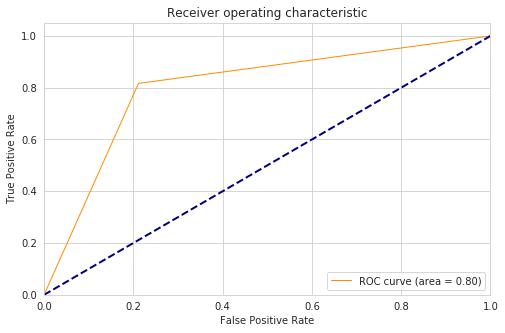


Acuuracy Of the Model:  0.8035714285714286 


KNeighborsClassifier : 


Confusion Matrix:
[[42 10]
 [27 33]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.81      0.69        52
           1       0.77      0.55      0.64        60

    accuracy                           0.67       112
   macro avg       0.69      0.68      0.67       112
weighted avg       0.69      0.67      0.67       112



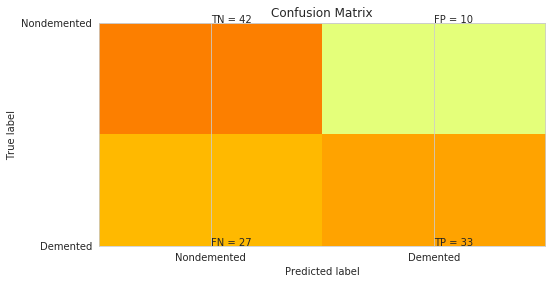

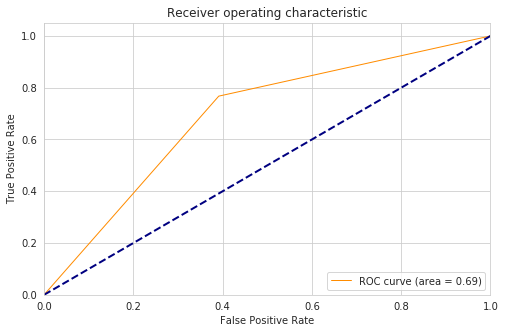


Acuuracy Of the Model:  0.6696428571428571 


MLPClassifier : 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




Confusion Matrix:
[[45  7]
 [18 42]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        52
           1       0.86      0.70      0.77        60

    accuracy                           0.78       112
   macro avg       0.79      0.78      0.78       112
weighted avg       0.79      0.78      0.78       112



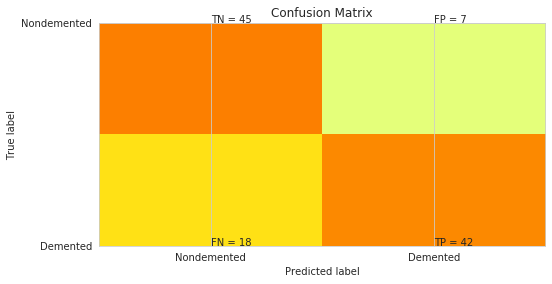

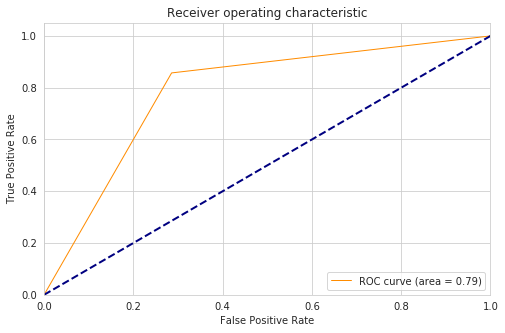


Acuuracy Of the Model:  0.7767857142857143 


GaussianNB : 


Confusion Matrix:
[[44  8]
 [22 38]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        52
           1       0.83      0.63      0.72        60

    accuracy                           0.73       112
   macro avg       0.75      0.74      0.73       112
weighted avg       0.75      0.73      0.73       112



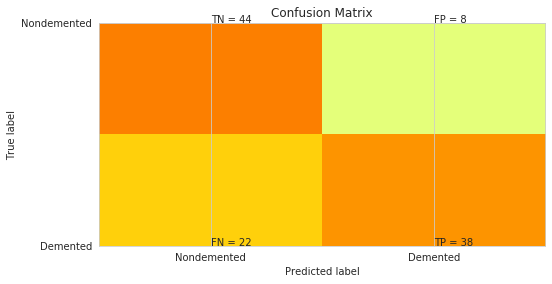

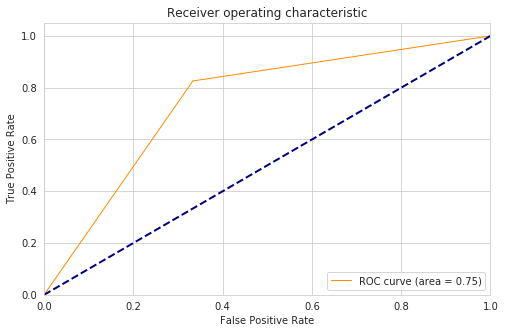


Acuuracy Of the Model:  0.7321428571428571 


LogisticRegression : 


Confusion Matrix:
[[41 11]
 [18 42]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        52
           1       0.79      0.70      0.74        60

    accuracy                           0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.75      0.74      0.74       112



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


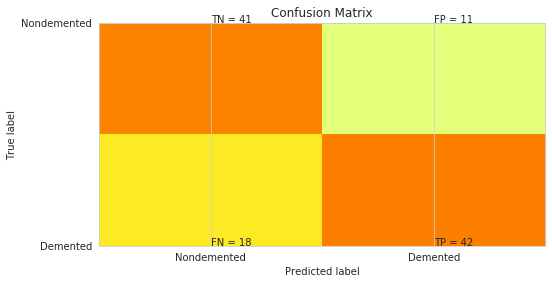

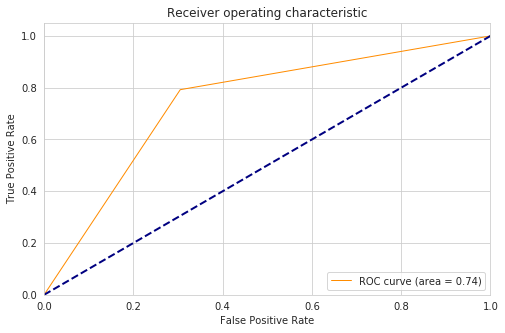


Acuuracy Of the Model:  0.7410714285714286 




In [0]:
for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_train,y_train.ravel())
    X = pd.DataFrame(X_train)
    report_performance(model)
    roc_curves(model)
    accuracy(model)